In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# read data
raw_data = pd.read_csv("kddcup_data_10_percent_corrected.csv")
raw_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [68]:
prop_of_attack_raw = 100*(raw_data[raw_data['class_label']!='normal.'].shape[0])/(raw_data.shape[0])
print('proportion of attacks in the original dataset is: %.2f '%prop_of_attack_raw)

data = raw_data[raw_data['logged_in'] == 1]
data = data[data['service'] == 'http']

prop_of_attack_data = 100*(data[data['class_label']!='normal.'].shape[0])/(data.shape[0])
print('proportion of attacks in the new dataset is: %.2f '%prop_of_attack_data)

proportion of attacks in the original dataset is: 80.31 
proportion of attacks in the new dataset is: 3.76 


In [69]:
# modify the class labels into: normal = 1, attack = -1
data.loc[data['class_label'] == 'normal.', 'behavior'] = int(1)
data.loc[data['class_label'] != 'normal.', 'behavior'] = int(-1)

ground_truth = np.array(data['behavior'], dtype=int)

In [70]:
data = data.drop(['service','logged_in','class_label','behavior'],axis=1)

In [75]:
# seperate numerical and categorical data

discrete_features = ['protocol_type','flag','land', 'root_shell', 'su_attempted', 
                     'is_host_login', 'is_guest_login']
discrete_data = data[discrete_features]

numerical_features = []
numerical_data = data[]

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

In [84]:
discrete_features = ['protocol_type','flag','land', 'root_shell', 'su_attempted', 
                     'is_host_login', 'is_guest_login']
columns = list(data.columns)
print(columns)
numerical_features = [y for y in columns if y not in discrete_features]
numerical_features = 

['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

dataset exploration

In [76]:
data['src_bytes'].describe()

count    58725.000000
mean      2282.454593
std      10259.946866
min          0.000000
25%        218.000000
50%        253.000000
75%        309.000000
max      54540.000000
Name: src_bytes, dtype: float64

In [48]:
data.corr()['behavior'].sort_values()

src_bytes                     -0.996752
hot                           -0.973662
num_compromised               -0.961066
srv_rerror_rate               -0.377775
rerror_rate                   -0.233317
dst_host_rerror_rate          -0.165770
dst_host_count                -0.126170
dst_host_srv_rerror_rate      -0.104972
dst_host_srv_serror_rate      -0.080186
diff_srv_rate                 -0.039013
dst_bytes                     -0.035578
root_shell                    -0.016989
dst_host_same_srv_rate        -0.016895
dst_host_serror_rate          -0.014919
srv_serror_rate               -0.012267
serror_rate                   -0.010510
srv_diff_host_rate            -0.010265
num_root                       0.001154
dst_host_diff_srv_rate         0.003286
duration                       0.007516
num_access_files               0.009893
same_srv_rate                  0.039940
dst_host_same_src_port_rate    0.056896
count                          0.133863
dst_host_srv_diff_host_rate    0.143624


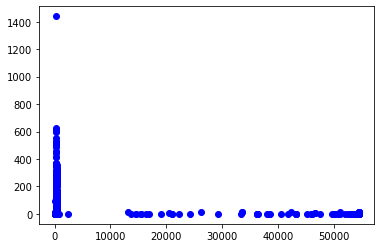

In [50]:
plot_data = data[['src_bytes','duration']]
plt.plot(plot_data['src_bytes'],plot_data['duration'],'bo')